In [3]:
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

# Binary Classification

In [28]:
def plot(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, 21)

    plt.plot(epochs, loss_values, 'bo', label='training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']

    plt.plot(epochs, acc_values, 'bo', label='training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

    print(f"minimum validation loss is ", round(min(history_dict['val_loss']), 2))
    print(f"max validation accuracy is ", round(max(history_dict['val_accuracy']), 2))


## Data Prep

In [52]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #take the top 10000 most refrequent words
#y labels are 0s and 1s where 1 means positive

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension)) #every data point is one sequence, the output is (#data samples, 10000 dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 
    return results

x_train = vectorize_sequences(train_data) #input X is 2D tensor 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32') #input y is a scalar
y_test = np.asarray(test_labels).astype('float32')

In [35]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [53]:
print(y_train)
print(train_labels)

[1. 0. 0. ... 0. 1. 0.]
[1 0 0 ... 0 1 0]


In [36]:
from collections import Counter

print(train_data[0])

counts = Counter(train_data[0])

non_duplicates_count = sum(1 for count in counts.values() if count == 1)

print("each x train data length before 1-hot encoding:", len(train_data[0]))
print("Number of non-duplicate x train data before 1-hot encoding:", non_duplicates_count)

print("after 1-hot encoding, x train data shape ", x_train.shape)
print("after 1-hot encoding, each x train data ", x_train[0])

print("before 1-hot encoding, y train data ", y_train)
print("after 1-hot encoding, y train data ", train_labels)


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
each x train data length before 1-hot encoding: 218
Number o

In [5]:
split_val = 10000
x_val = x_train[:split_val]
partial_x_train = x_train[split_val:]
y_val = y_train[:split_val]
partial_y_train = y_train[split_val:]

## Construct Neural Net

In [22]:
from keras import models
from keras import layers

# First construct the neural network
# two hidden layers, each hidden layer has 16 hidden units
# binary prediction so the last layer has 1 unit
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

## Chose loss function and optimizer
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])

## or can write out specifically 
# from keras import optimizers
# from keras import losses
# from keras import metrics
# model.compile(optimizer = optimizers.RMSprop(lr=0.001), 
#               loss = losses.binary_crossentropy, 
#               metrics=['accuracy'])

# Train model for 20 epochs with 512 samples mini batch
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 13ms/step - loss: 0.5206 - accuracy: 0.8002 - val_loss: 0.4002 - val_accuracy: 0.8666
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3195 - accuracy: 0.8984 - val_loss: 0.3309 - val_accuracy: 0.8713
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2350 - accuracy: 0.9237 - val_loss: 0.2893 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1865 - accuracy: 0.9392 - val_loss: 0.2738 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1497 - accuracy: 0.9525 - val_loss: 0.2792 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1263 - accuracy: 0.9609 - val_loss: 0.2893 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1035 - accuracy: 0.9697 - val_loss: 0.3116 - val_accuracy: 0.8814
Epoch 8/20
30/30 [=

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

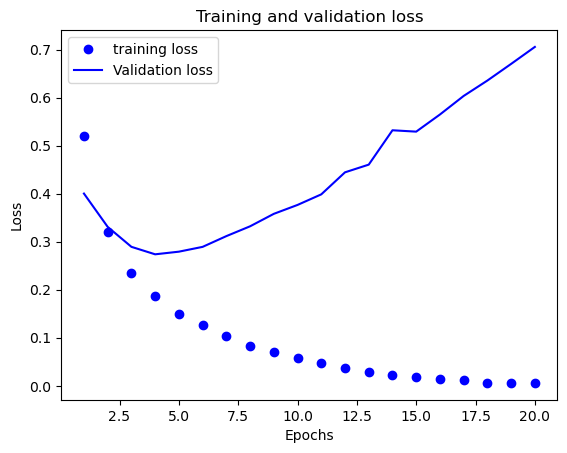

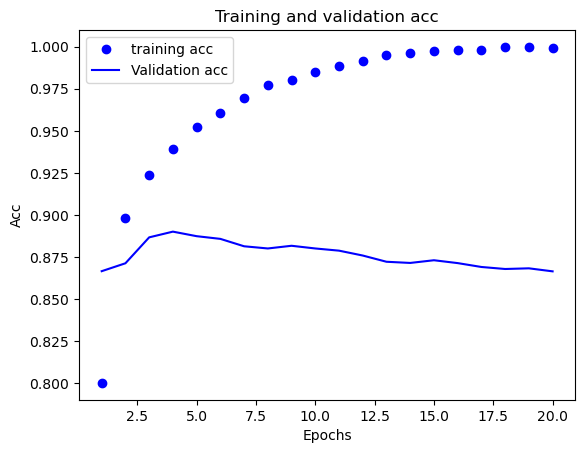

minimum validation loss is  0.27
max validation accuracy is  0.89


In [23]:
plot(history)
#result shows that this is overfitting

In [10]:
model.predict(x_test)

array([[0.00472224],
       [0.9999998 ],
       [0.93820024],
       ...,
       [0.00145388],
       [0.01059818],
       [0.71134114]], dtype=float32)

## Other Hyperparameters Try Out

### 3 hidden layers instead of 2
The result shows that the overfitting problem is even worse. The validate loss is not improving

Epoch 1/20
30/30 [==============================] - 1s 16ms/step - loss: 0.5550 - accuracy: 0.7330 - val_loss: 0.4098 - val_accuracy: 0.8716
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3233 - accuracy: 0.8973 - val_loss: 0.3077 - val_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2215 - accuracy: 0.9299 - val_loss: 0.2817 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1689 - accuracy: 0.9457 - val_loss: 0.2789 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1307 - accuracy: 0.9585 - val_loss: 0.3024 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0979 - accuracy: 0.9715 - val_loss: 0.3732 - val_accuracy: 0.8695
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0773 - accuracy: 0.9765 - val_loss: 0.3414 - val_accuracy: 0.8791
Epoch 8/20
30/30 [=

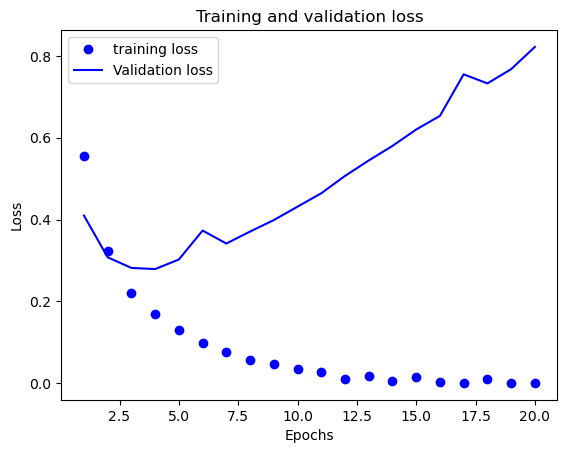

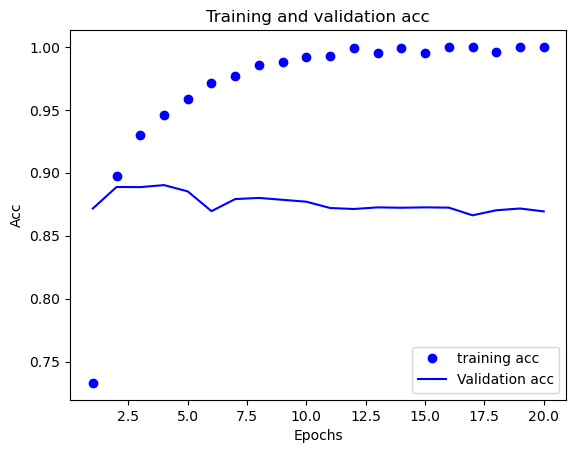

minimum validation loss is  0.28
max validation accuracy is  0.89


In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plot(history)

### 32 units hidden layers instead of 16

No significant improvement

Epoch 1/20
30/30 [==============================] - 1s 12ms/step - loss: 0.4910 - accuracy: 0.7809 - val_loss: 0.3847 - val_accuracy: 0.8469
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2775 - accuracy: 0.9061 - val_loss: 0.2859 - val_accuracy: 0.8904
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2018 - accuracy: 0.9297 - val_loss: 0.3028 - val_accuracy: 0.8786
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1561 - accuracy: 0.9480 - val_loss: 0.2789 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1202 - accuracy: 0.9618 - val_loss: 0.2923 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0971 - accuracy: 0.9686 - val_loss: 0.3138 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0758 - accuracy: 0.9770 - val_loss: 0.3525 - val_accuracy: 0.8816
Epoch 8/20
30/30 [=

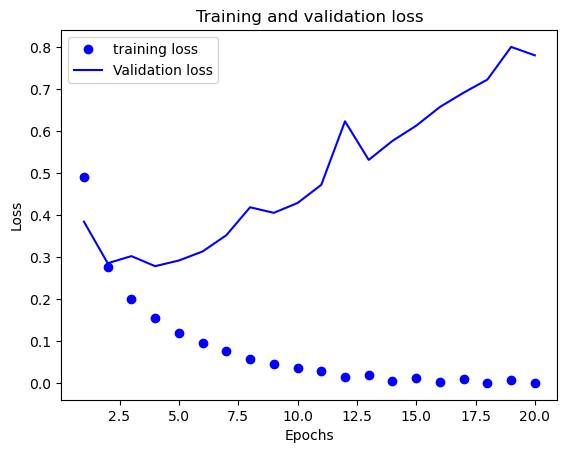

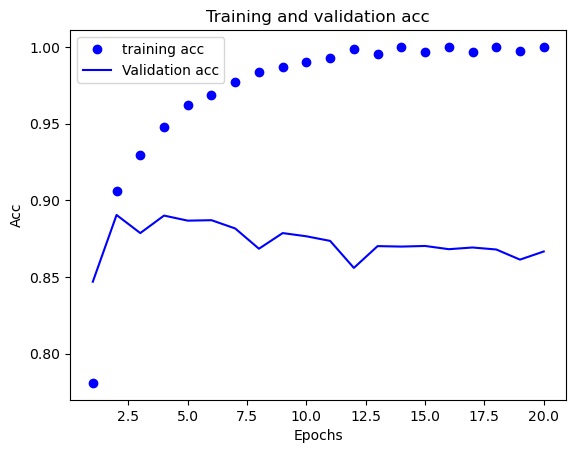

minimum validation loss is  0.28
max validation accuracy is  0.89


In [25]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plot(history)

### tanh activation instead of relu

No significant improvement

Epoch 1/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4868 - accuracy: 0.7936 - val_loss: 0.3951 - val_accuracy: 0.8370
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2807 - accuracy: 0.9065 - val_loss: 0.3156 - val_accuracy: 0.8719
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2025 - accuracy: 0.9309 - val_loss: 0.2683 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1475 - accuracy: 0.9504 - val_loss: 0.2926 - val_accuracy: 0.8802
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1207 - accuracy: 0.9593 - val_loss: 0.3021 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0906 - accuracy: 0.9710 - val_loss: 0.3269 - val_accuracy: 0.8801
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0699 - accuracy: 0.9785 - val_loss: 0.3717 - val_accuracy: 0.8783
Epoch 8/20
30/30 [==

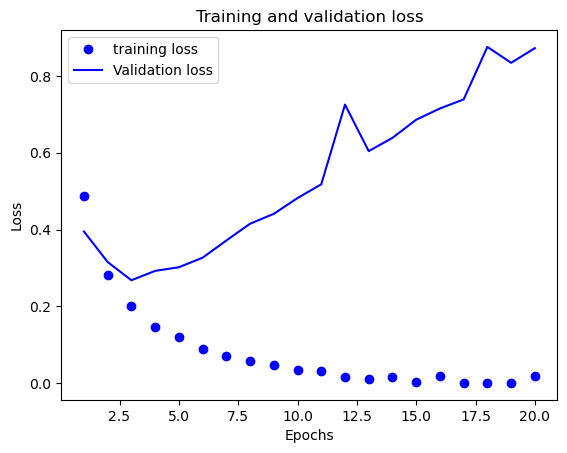

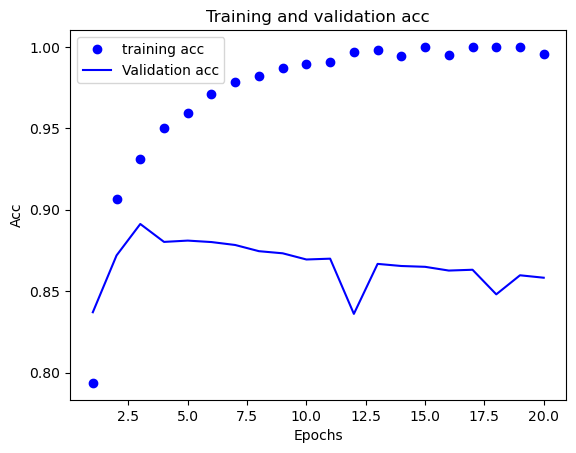

minimum validation loss is  0.27
max validation accuracy is  0.89


In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plot(history)

# Multi Class Classification

## Data Prep

In [54]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) #take the top 10000 most refrequent words
#y labels are between 0-45 showing different classes

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension)) #every data point is one sequence, the output is (#data samples, 10000 dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 
    return results

x_train = vectorize_sequences(train_data) #input X is 2D tensor 
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [56]:
print(train_labels)
print(len(train_labels))
print("-----")
print(one_hot_train_labels)
print(len(one_hot_train_labels))
print(len(one_hot_train_labels[0]))
# Needs to one-hot encode the labels to map the softmax layer. 
# there are 46 columns represent 46 different output classes. each row is one data sample
# the result labels is a list of list
# for sigmoid we only have 1 output, so each number in the list is sufficient to resent the label. 
# So the labels is just a list with length as the number of data samples

[ 3  4  3 ... 25  3 25]
8982
-----
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
8982
46


In [47]:
split_val = 1000
x_val = x_train[:split_val]
partial_x_train = x_train[split_val:]
y_val = one_hot_train_labels[:split_val]
partial_y_train = one_hot_train_labels[split_val:]

## Construct Neural Net

Epoch 1/20
16/16 [==============================] - 1s 19ms/step - loss: 2.7747 - accuracy: 0.4460 - val_loss: 1.8333 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4965 - accuracy: 0.7031 - val_loss: 1.3388 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0849 - accuracy: 0.7750 - val_loss: 1.1475 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8451 - accuracy: 0.8215 - val_loss: 1.0428 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6661 - accuracy: 0.8626 - val_loss: 0.9661 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.5308 - accuracy: 0.8913 - val_loss: 0.9165 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4264 - accuracy: 0.9129 - val_loss: 0.8834 - val_accuracy: 0.8270
Epoch 8/20
16

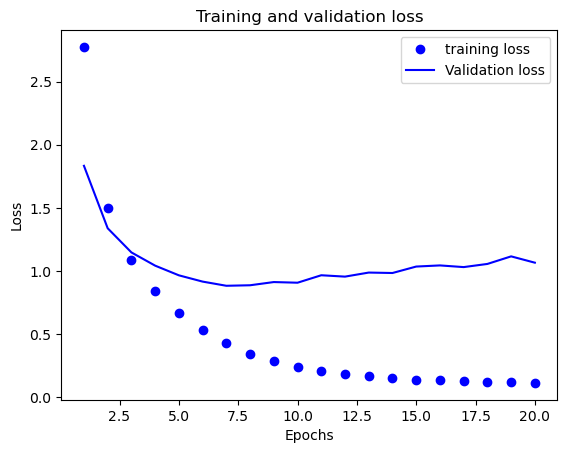

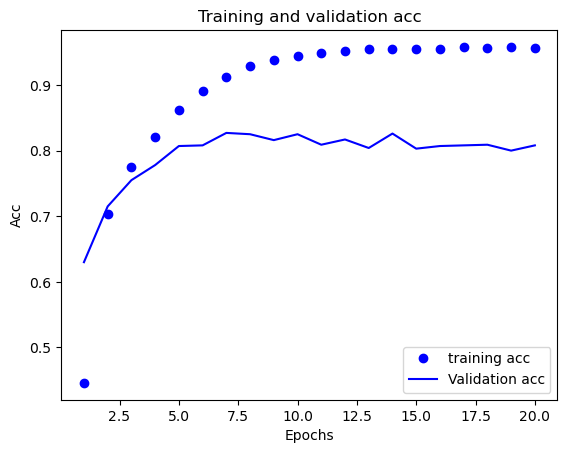

minimum validation loss is  0.88
max validation accuracy is  0.83


In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', #different loss as binary classification. Categorical crossentropy needs categorical encoding (aka one hot encoding)
              metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plot(history)

In [57]:
results = model.evaluate(x_test, one_hot_test_labels)
results #the result is (test loss, test accuracy)

71/71 [==============================] - 0s 728us/step - loss: 1.1748 - accuracy: 0.7925


[1.1747502088546753, 0.7925200462341309]

In [58]:
# make prediction
predictions = model.predict(x_test)
print("each output is a vector of length 46 ", predictions[0].shape)
print("the coefficients in each vector sum to 1 ", np.sum(predictions[0]))
print("the largest entry is the predicted class ", np.argmax(predictions[0]))

each output is a vector of length 46  (46,)
the coefficients in each vector sum to 1  1.0000001
the largest entry is the predicted class  3


#### Different Label Encoding

Epoch 1/20
16/16 [==============================] - 0s 15ms/step - loss: 2.6733 - accuracy: 0.5190 - val_loss: 1.7916 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 1.4535 - accuracy: 0.6962 - val_loss: 1.3560 - val_accuracy: 0.6810
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 1.0699 - accuracy: 0.7744 - val_loss: 1.1660 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8414 - accuracy: 0.8255 - val_loss: 1.0635 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.6670 - accuracy: 0.8609 - val_loss: 0.9878 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.5302 - accuracy: 0.8885 - val_loss: 0.9592 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.4269 - accuracy: 0.9113 - val_loss: 0.9211 - val_accuracy: 0.8000
Epoch 8/20
16/

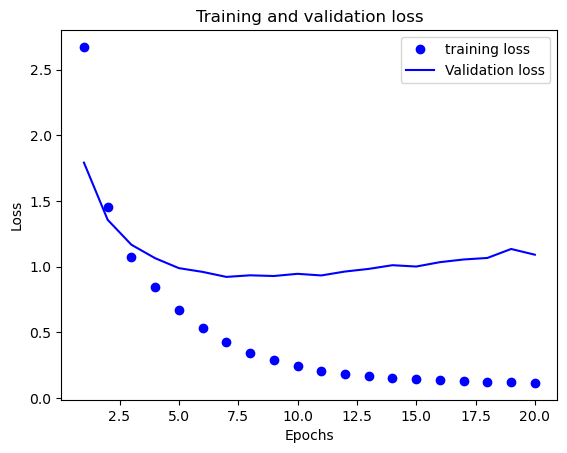

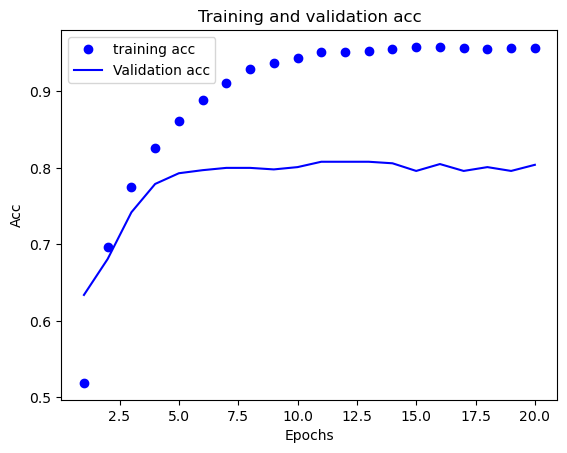

minimum validation loss is  0.92
max validation accuracy is  0.81


In [60]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
split_val = 1000
x_val = x_train[:split_val]
partial_x_train = x_train[split_val:]
y_val = y_train[:split_val]
partial_y_train = y_train[split_val:]

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', 
              loss = 'sparse_categorical_crossentropy', #sparse crossentropy just need regular integer tensor)
              metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plot(history)

In [61]:
print(train_labels)
print(y_train)

[ 3  4  3 ... 25  3 25]
[ 3  4  3 ... 25  3 25]


## Other Hyperparameters Tryout

### User less hidden units 

Introduce information bottleneck in the middle will lose the accuracy.

Generally you are predicting 46 classes, the hidden layer size should be bigger than 46 classes.

Epoch 1/20
16/16 [==============================] - 0s 12ms/step - loss: 3.6037 - accuracy: 0.1304 - val_loss: 3.3910 - val_accuracy: 0.2320
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 3.2003 - accuracy: 0.2610 - val_loss: 3.1127 - val_accuracy: 0.2680
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 2.9148 - accuracy: 0.2739 - val_loss: 2.9118 - val_accuracy: 0.2790
Epoch 4/20
16/16 [==============================] - 0s 10ms/step - loss: 2.6967 - accuracy: 0.2879 - val_loss: 2.7498 - val_accuracy: 0.2850
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 2.5158 - accuracy: 0.3096 - val_loss: 2.6071 - val_accuracy: 0.3070
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 2.3468 - accuracy: 0.3309 - val_loss: 2.4721 - val_accuracy: 0.3120
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 2.1667 - accuracy: 0.3414 - val_loss: 2.3183 - val_accuracy: 0.3150
Epoch 8/20
16/1

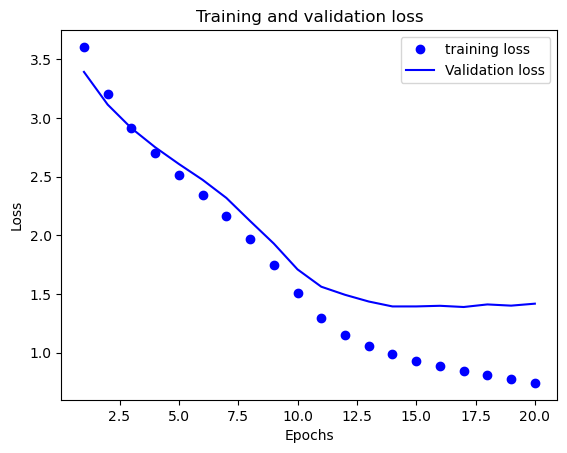

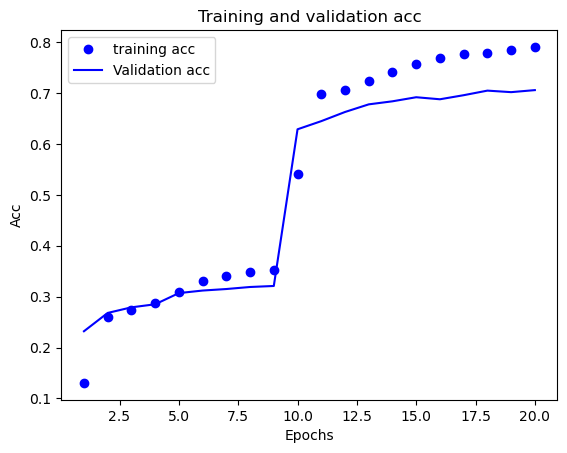

minimum validation loss is  1.39
max validation accuracy is  0.71


In [62]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', 
              loss = 'sparse_categorical_crossentropy', #sparse crossentropy just need regular integer tensor)
              metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plot(history)

### User 6 layers instead of 2

Adding too many layers would result in information loss and slow training

Epoch 1/20
16/16 [==============================] - 0s 14ms/step - loss: 2.8014 - accuracy: 0.3589 - val_loss: 1.8811 - val_accuracy: 0.5180
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.6955 - accuracy: 0.5808 - val_loss: 1.6092 - val_accuracy: 0.5910
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.3432 - accuracy: 0.6904 - val_loss: 1.3333 - val_accuracy: 0.6860
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 1.1142 - accuracy: 0.7275 - val_loss: 1.2244 - val_accuracy: 0.7090
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.9405 - accuracy: 0.7628 - val_loss: 1.1971 - val_accuracy: 0.7220
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8184 - accuracy: 0.7972 - val_loss: 1.1932 - val_accuracy: 0.7390
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6891 - accuracy: 0.8309 - val_loss: 1.1970 - val_accuracy: 0.7390
Epoch 8/20
16

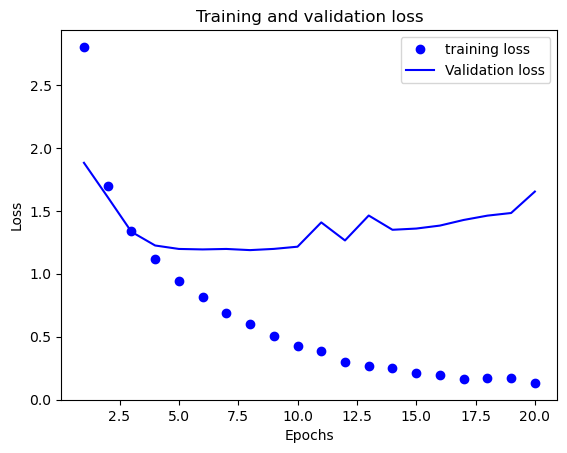

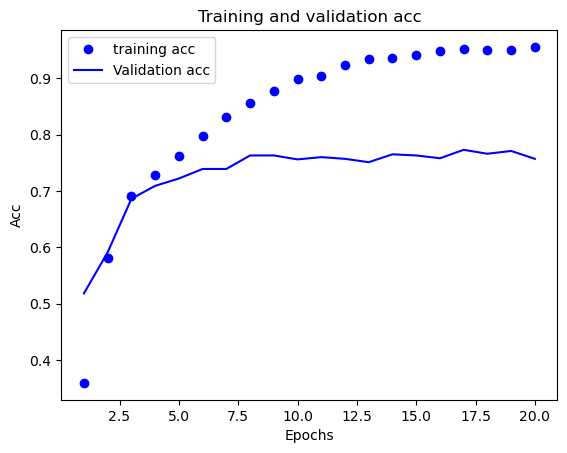

minimum validation loss is  1.19
max validation accuracy is  0.77


In [64]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', 
              loss = 'sparse_categorical_crossentropy', #sparse crossentropy just need regular integer tensor)
              metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plot(history)

# Regression

## Data Prep

data sample is small so we use k-fold validation. 

data is split between train and val dataset by n times. Train k identical models. 
The final score is the average of all validation score. 

In [67]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() 
#y labels are between 0-45 showing different classes

print(train_data.shape) #404 data points with 13 features
print(test_data.shape)
print(train_targets) #house price in thoudsands

65536/57026 [==================================] - 0s 0us/step
(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.

In [68]:
#feature normalization (batch normalization)
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean #use train data mean and std to apply for test data
test_data /= std

## Construct Neural Net

In [71]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape=(13,)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1)) #no activation in the last layer because the last layer is linear to predict a value

    model.compile(optimizer = 'rmsprop', 
                loss = 'mse', 
                metrics=['mae']) #mae is the absolute value of the difference between predictions and the targets
    return model

In [83]:
# K fold validation is only meant for model evaluation purpose. 

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis = 0)

    model = build_model()
    history = model.fit(partial_train_data, 
                        partial_train_targets,
                        validation_data = (val_data, val_targets),
                        epochs = 100,
                        batch_size=1)

    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)


processing fold # 0
Epoch 1/100
303/303 [==============================] - 0s 620us/step - loss: 199.9974 - mae: 10.8030 - val_loss: 44.2598 - val_mae: 4.2361
Epoch 2/100
303/303 [==============================] - 0s 424us/step - loss: 33.4630 - mae: 3.9333 - val_loss: 31.2428 - val_mae: 3.7290
Epoch 3/100
303/303 [==============================] - 0s 413us/step - loss: 24.7542 - mae: 3.4181 - val_loss: 24.1789 - val_mae: 2.9657
Epoch 4/100
303/303 [==============================] - 0s 422us/step - loss: 19.8750 - mae: 2.9245 - val_loss: 20.1732 - val_mae: 2.6402
Epoch 5/100
303/303 [==============================] - 0s 432us/step - loss: 18.1036 - mae: 2.6700 - val_loss: 17.2310 - val_mae: 2.6521
Epoch 6/100
303/303 [==============================] - 0s 408us/step - loss: 16.8639 - mae: 2.6035 - val_loss: 14.7683 - val_mae: 2.4465
Epoch 7/100
303/303 [==============================] - 0s 401us/step - loss: 15.5680 - mae: 2.5007 - val_loss: 14.7553 - val_mae: 2.3724
Epoch 8/100
303/303

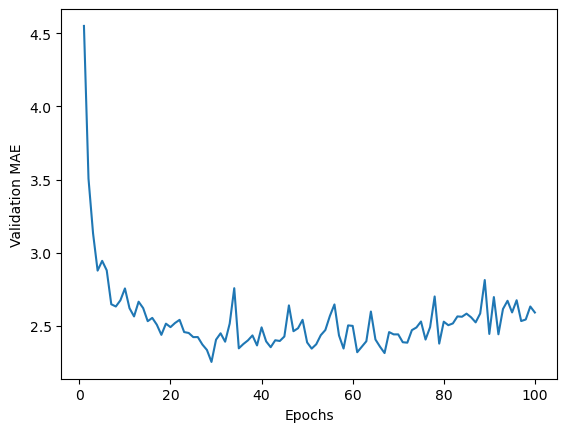

In [85]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [72]:
# When make prediction, use the entire dataset to train the model first 
model = build_model()
history = model.fit(train_data, 
                    train_targets,
                    epochs = 80,
                    batch_size=16)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mse_score)
print(test_mae_score) #on average the result is off by $2650

Epoch 1/80
26/26 [==============================] - 0s 456us/step - loss: 490.2383 - mae: 20.2044
Epoch 2/80
26/26 [==============================] - 0s 453us/step - loss: 310.8911 - mae: 15.3647
Epoch 3/80
26/26 [==============================] - 0s 426us/step - loss: 147.1761 - mae: 9.6451
Epoch 4/80
26/26 [==============================] - 0s 369us/step - loss: 68.6709 - mae: 6.2446
Epoch 5/80
26/26 [==============================] - 0s 350us/step - loss: 41.2379 - mae: 4.7540
Epoch 6/80
26/26 [==============================] - 0s 335us/step - loss: 28.5921 - mae: 3.8704
Epoch 7/80
26/26 [==============================] - 0s 348us/step - loss: 22.6565 - mae: 3.3946
Epoch 8/80
26/26 [==============================] - 0s 335us/step - loss: 19.7521 - mae: 3.1389
Epoch 9/80
26/26 [==============================] - 0s 348us/step - loss: 17.5732 - mae: 3.0034
Epoch 10/80
26/26 [==============================] - 0s 342us/step - loss: 15.7242 - mae: 2.7976
Epoch 11/80
26/26 [===============